In [3]:
import MinBaseFactorFramework as ff
from MinBaseFactorFramework.fac_exp_exec import *
from MinBaseFactorFramework.util_function import *
from MinBaseFactorFramework.torch_operators import *
from MinBaseFactorFramework.save_support import SDataset
from gp_config import *
import re

FileNotFoundError: [Errno 2] No such file or directory: '/home/intern1/hft_database/nas4/Stock60sData/base_list.pkl'

In [4]:
import pandas as pd
import os

path = '/home/intern1/intern_lzr/gplearn_min_data/gp_result/LeaderBoard_start20210101-end20210915-start_t93000-end_t145500-ic0.03-ls0.003-gens4-pop1000-decorrFalse/'

file_list = os.listdir(path)

df = pd.DataFrame()

for csv_file in file_list:
    df = pd.concat([df, pd.read_csv(path + csv_file, index_col = 0)])

In [7]:
df['is_ic'] = df['IC_mean'].abs() > 0.03
df['is_ret'] = df['ret'].abs() > 0.003

In [12]:
df['ret']

round
55    0.005238
55    0.004795
55    0.004211
55    0.004083
55    0.006367
        ...   
75    0.003832
75    0.003581
75    0.004523
75    0.004912
75    0.004563
Name: ret, Length: 102, dtype: float64

AttributeError: 'Rectangle' object has no property 'title'

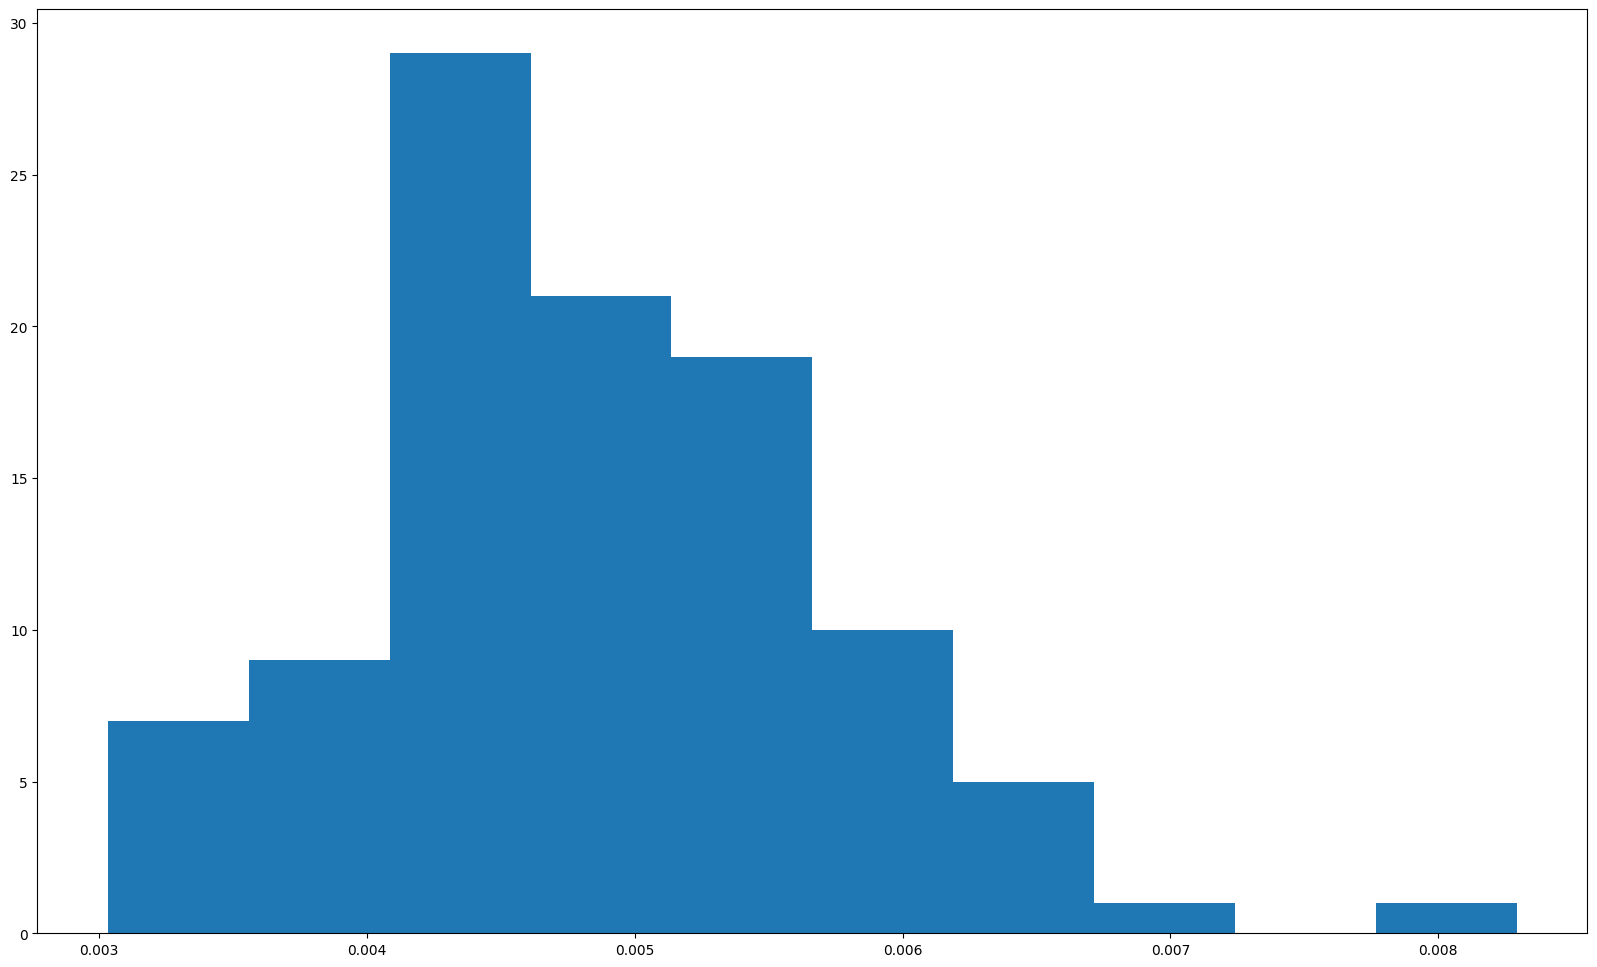

In [14]:
df['ret'].hist(figsize = (20,12), title = 'Ret Hist')

In [2]:
print(len((1)))

TypeError: object of type 'int' has no len()

In [33]:
import torch

# 假设字典的数据结构如下
data = {
    'tensor1': torch.randn(100, 10),  # 100 行 10 列的随机 Tensor
    'tensor2': torch.randn(120, 15),  # 120 行 15 列的随机 Tensor
    # 其他键值对...
}

# 去掉每个 Tensor 的前 30 行
for key, value in data.items():
    if isinstance(value, torch.Tensor) and value.dim() >= 2:  # 检查是否为二维以上的 Tensor
        data[key] = value[30:]  # 去掉前 30 行

# 打印处理后的字典
print(data)


{'tensor1': tensor([[-0.5342, -1.2127,  0.7652,  1.7842, -1.5281,  0.5586,  1.3505, -0.8614,
          0.3892,  2.5997],
        [ 0.7837, -0.6129,  0.9587,  0.3461,  0.1845,  0.1942, -0.4815,  0.0804,
         -1.2591, -0.7361],
        [ 0.0916, -0.1041, -0.4230,  1.1901, -0.2264,  1.3189, -0.2651,  0.1243,
          0.3427,  1.3025],
        [ 0.6331, -0.1349, -0.4684,  0.2521,  0.8966,  1.0890, -0.1076,  0.5343,
         -1.4933, -0.0504],
        [-0.8312, -0.7856,  0.9292, -0.3374, -1.1190,  1.0007,  0.5981,  0.3829,
          0.6522,  1.7344],
        [ 0.6207, -0.9281, -2.4168,  0.8279, -0.2380,  0.7061, -0.4713, -0.4169,
          0.6318,  1.6246],
        [ 1.2957, -0.6839, -0.0249,  1.2566, -0.4510,  0.0754, -1.7185,  0.8741,
         -0.2952,  0.3165],
        [-0.4853, -1.3551,  0.2545, -1.0747, -0.0680,  1.3855,  0.0445,  0.1306,
         -0.0549, -0.4233],
        [-1.3230,  0.9235,  0.6269,  0.8497, -1.5545,  0.7181, -0.5055,  0.8449,
          0.7984, -0.9610],
       

In [29]:
GpConfig.start_ind

0

In [32]:
GlobalConfig.trade_time_loc_dict

{93000000: 0,
 93100000: 1,
 93200000: 2,
 93300000: 3,
 93400000: 4,
 93500000: 5,
 93600000: 6,
 93700000: 7,
 93800000: 8,
 93900000: 9,
 94000000: 10,
 94100000: 11,
 94200000: 12,
 94300000: 13,
 94400000: 14,
 94500000: 15,
 94600000: 16,
 94700000: 17,
 94800000: 18,
 94900000: 19,
 95000000: 20,
 95100000: 21,
 95200000: 22,
 95300000: 23,
 95400000: 24,
 95500000: 25,
 95600000: 26,
 95700000: 27,
 95800000: 28,
 95900000: 29,
 100000000: 30,
 100100000: 31,
 100200000: 32,
 100300000: 33,
 100400000: 34,
 100500000: 35,
 100600000: 36,
 100700000: 37,
 100800000: 38,
 100900000: 39,
 101000000: 40,
 101100000: 41,
 101200000: 42,
 101300000: 43,
 101400000: 44,
 101500000: 45,
 101600000: 46,
 101700000: 47,
 101800000: 48,
 101900000: 49,
 102000000: 50,
 102100000: 51,
 102200000: 52,
 102300000: 53,
 102400000: 54,
 102500000: 55,
 102600000: 56,
 102700000: 57,
 102800000: 58,
 102900000: 59,
 103000000: 60,
 103100000: 61,
 103200000: 62,
 103300000: 63,
 103400000: 64,


In [13]:
def my_compile(expr):
    '''
    编译表达式，将因子名替换成可执行的数据即可，算子名直接从导入的函数中读取。
    1、直接计算：        e.g., lambda factor_dict:abs(factor_dict['bp1'])
    2、沿着第一维循环计算：  e.g., lambda factor_dict,date_num:[abs(factor_dict['bp1'][i]) for i in range(date_num)]
    '''
    code = str(expr)
    # 利用对应关系转换成可执行的代码func_map_dict.keys()
    code_split = re.split('([\(,\)\s])', code) 
    #code_transform_list = ['factor_dict[\'%s\']' %j if j in factor_names else j for j in code_split]
    code_transform_list = ['factor_dict[\'%s\'][i]' %j if j in factor_names else j for j in code_split]  #第二种读取方式
    code_transform = ''.join(code_transform_list)
    #return eval('lambda factor_dict:' + code_transform)   
    return eval(rf'lambda factor_dict,date_num:[{code_transform} for i in range(date_num)]')   

def formula_to_value(formula, factor_dict, date_num):
    func = my_compile(formula)
    result = func(factor_dict, date_num)
    print(formula)
    print(result[0])
    return torch.stack(result)

In [14]:
formula = 'ts_decay_linear(div(OrderVolSum_S, OrderAmtMax_B), 2)'

In [16]:
factor_names = load_pickle('/home/intern1/hft_database/nas4/Stock60sData/base_list.pkl').tolist()
factor_value_sample = formula_to_value(formula, factor_dict, 40)

ts_decay_linear(div(OrderVolSum_S, OrderAmtMax_B), 2)
tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)


In [22]:
factor_dict['OrderVolSum_S']

tensor([[[nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         ...,
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan]],

        [[nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         ...,
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan]],

        [[nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         ...,
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan,  ..., nan, nan, nan],
         [nan, nan, nan,  ..., nan, nan, nan]

In [21]:
pd.DataFrame(factor_value_sample[0].numpy()).describe()

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
count,266.0,266.0,266.0,266.0,266.0,266.0,266.0,266.0,266.0,266.0,...,266.0,266.0,266.0,266.0,266.0,266.0,266.0,266.0,266.0,266.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
formula_to_value()

In [5]:
factor_dict = pd.read_pickle("factor_dict_local.pkl")

In [7]:
factor_dict['1d_exret'].shape

torch.Size([40, 237, 800])

In [24]:
factor_dict['CancelNumSum_B'][0]

tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], dtype=torch.float64)

In [2]:
from basic_functions import  *

In [5]:
GpConfig.start_ind

0

In [6]:
GpConfig.end_ind

30

In [4]:
GpConfig.intraday_length

30

In [5]:
for key, value in fac_dict.items():
    print(key, value.shape)

preclose torch.Size([800])
vol1 torch.Size([800])
vol5 torch.Size([800])
vol20 torch.Size([800])
amt torch.Size([800])
amt5 torch.Size([800])
amt20 torch.Size([800])
mv torch.Size([800])
cmv torch.Size([800])
pre_vol torch.Size([800])
pre_vol_std torch.Size([800])
pre_up_vol torch.Size([800])
pre_down_vol torch.Size([800])
pre_num torch.Size([800])
pre_up_num torch.Size([800])
pre_down_num torch.Size([800])
pre_rit_std torch.Size([800])
pre_up_rit torch.Size([800])
pre_down_rit torch.Size([800])
CancelNumSum_B torch.Size([267, 800])
CancelNumSum_S torch.Size([267, 800])
CancelVolMax_B torch.Size([267, 800])
CancelVolMax_S torch.Size([267, 800])
CancelVolSum_B torch.Size([267, 800])
CancelVolSum_S torch.Size([267, 800])
Close torch.Size([267, 800])
High torch.Size([267, 800])
Low torch.Size([267, 800])
Open torch.Size([267, 800])
OrderAmtMax_B torch.Size([267, 800])
OrderAmtMax_S torch.Size([267, 800])
OrderAmtSum_B torch.Size([267, 800])
OrderAmtSum_S torch.Size([267, 800])
OrderAmtbig

In [10]:
import re
def my_compile(expr):
    '''
    编译表达式，将因子名替换成可执行的数据即可，算子名直接从导入的函数中读取。
    1、直接计算：        e.g., lambda factor_dict:abs(factor_dict['bp1'])
    2、沿着第一维循环计算：  e.g., lambda factor_dict,date_num:[abs(factor_dict['bp1'][i]) for i in range(date_num)]
    '''
    code = str(expr)
    # 利用对应关系转换成可执行的代码func_map_dict.keys()
    code_split = re.split('([\(,\)\s])', code) 
    #code_transform_list = ['factor_dict[\'%s\']' %j if j in factor_names else j for j in code_split]
    code_transform_list = ['factor_dict[\'%s\'][i]' %j if j in factor_names else j for j in code_split]  #第二种读取方式
    code_transform = ''.join(code_transform_list)
    #return eval('lambda factor_dict:' + code_transform)   
    return rf'lambda factor_dict,date_num:[{code_transform} for i in range(date_num)]'

# def formula_to_value(formula, factor_dict):
#     func = my_compile(formula)
#     return func(factor_dict)

def formula_to_value(formula, factor_dict, date_num):
    func = my_compile(formula)
    result=torch.stack(func(factor_dict, date_num))
    return result

In [18]:
def get_factor_names():
    factor_names = load_pickle('/home/intern1/hft_database/nas4/Stock60sData/base_list.pkl')
    return factor_names

In [11]:
my_compile("ts_skew(sv1,60)")

"lambda factor_dict,date_num:[ts_skew(factor_dict['sv1'][i],60) for i in range(date_num)]"

In [19]:
get_factor_names()

Index(['OrderNumSum_B', 'OrderPriceMean_B', 'OrderPriceStd_B', 'OrderVolSum_B',
       'OrderVolMax_B', 'OrderAmtSum_B', 'OrderAmtMax_B', 'OrderAmtbig_B',
       'OrderAmtmid_B', 'OrderAmtsma_B', 'OrderVolbig_B', 'OrderVolmid_B',
       'OrderVolsma_B', 'OrderNumSum_S', 'OrderPriceMean_S', 'OrderPriceStd_S',
       'OrderVolSum_S', 'OrderVolMax_S', 'OrderAmtSum_S', 'OrderAmtMax_S',
       'OrderAmtbig_S', 'OrderAmtmid_S', 'OrderAmtsma_S', 'OrderVolbig_S',
       'OrderVolmid_S', 'OrderVolsma_S', 'CancelNumSum_B', 'CancelVolSum_B',
       'CancelVolMax_B', 'CancelNumSum_S', 'CancelVolSum_S', 'CancelVolMax_S',
       'TradeNumSum_B', 'TradePriceMean_B', 'TradePriceStd_B', 'TradeVolSum_B',
       'TradeVolMax_B', 'TradeAmtSum_B', 'TradeAmtMax_B', 'TradeAmtbig_B',
       'TradeAmtmid_B', 'TradeAmtsma_B', 'TradeVolbig_B', 'TradeVolmid_B',
       'TradeVolsma_B', 'TradeNumSum_S', 'TradePriceMean_S', 'TradePriceStd_S',
       'TradeVolSum_S', 'TradeVolMax_S', 'TradeAmtSum_S', 'TradeAmtMax_S',

In [12]:
factor_generator['bp1']

tensor([[    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        ...,
        [16.6400, 20.4800,  4.5200,  ..., 42.4800, 53.1100, 68.9300],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan]],
       dtype=torch.float64)

In [25]:
ret_data_all = Ret_data('20220104').get_ret_data_all('1d')

In [27]:
ret_data_all.shape

(237, 4672)

In [29]:
GlobalConfig.trade_code_loc_dict

{'000001': 0,
 '000002': 1,
 '000003': 2,
 '000004': 3,
 '000005': 4,
 '000006': 5,
 '000007': 6,
 '000008': 7,
 '000009': 8,
 '000010': 9,
 '000011': 10,
 '000012': 11,
 '000013': 12,
 '000014': 13,
 '000015': 14,
 '000016': 15,
 '000017': 16,
 '000018': 17,
 '000019': 18,
 '000020': 19,
 '000021': 20,
 '000022': 21,
 '000023': 22,
 '000024': 23,
 '000025': 24,
 '000026': 25,
 '000027': 26,
 '000028': 27,
 '000029': 28,
 '000030': 29,
 '000031': 30,
 '000032': 31,
 '000033': 32,
 '000034': 33,
 '000035': 34,
 '000036': 35,
 '000037': 36,
 '000038': 37,
 '000039': 38,
 '000040': 39,
 '000042': 40,
 '000043': 41,
 '000045': 42,
 '000046': 43,
 '000047': 44,
 '000048': 45,
 '000049': 46,
 '000050': 47,
 '000055': 48,
 '000056': 49,
 '000058': 50,
 '000059': 51,
 '000060': 52,
 '000061': 53,
 '000062': 54,
 '000063': 55,
 '000065': 56,
 '000066': 57,
 '000068': 58,
 '000069': 59,
 '000070': 60,
 '000078': 61,
 '000088': 62,
 '000089': 63,
 '000090': 64,
 '000096': 65,
 '000099': 66,
 '000

In [30]:
ret_data_all.columns

Int64Index([     1,      2,      4,      5,      6,      7,      8,      9,
                10,     11,
            ...
            839167, 839680, 839729, 839946, 870436, 871396, 871553, 871642,
            871981, 872925],
           dtype='int64', length=4672)

In [23]:
print(fac_data.shape)

torch.Size([237, 4009])


In [2]:
# 初始化因子计算结构体
factor_generator = Factor_data('20220104', _dtype='float32')

# 定义因子表达式
fac_exp = "ts_skew(sv1,60)"

# 执行因子计算
fac_data = factor_generator.exec_fac_exp_daily_single(fac_exp)

# 输出因子数据
print(fac_data)

tensor([[    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        [    nan,     nan,     nan,  ...,     nan,     nan,     nan],
        ...,
        [ 1.1888,  3.8269, -0.0290,  ...,  2.0953,  1.4269,  2.7649],
        [ 1.1460,  3.8236, -0.0260,  ...,  2.0914,  1.4777,  2.7616],
        [ 1.1012,  3.8251, -0.0568,  ...,  2.0875,  1.5026,  2.7572]])
